# BUSINESS CASE:- BASED ON THE GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE .

### EXPLOTARY DATA ANALYSIS SUMMARY:
- Basic checks of data
- Examine the data
- Statistical measures of data
- Department Wise performance
- Percent count of employee department with performance rating
- Top 3 Important Factors effecting employee performance
- Checking the distribution of continuous features
- Check skewnwness and kurtosis
- Distribution of mean of data
- Distribution of standard deviation of data

## IMPORT BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA FOR EXPLORATORY DATA ANALYSIS

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## BASIC CHECK

In [3]:
# for getting first 5 rows
data.head() 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
# for geting last 5 rows
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [5]:
# determine the dimensions of data (number of rows and columns)
data.shape

(1200, 28)

* The dataset contain 1200 observation with 28 feature.

In [6]:
# we get total columns
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

* Total 28 feature is present in the dataset including target variable i.e PerformanceRating

In [7]:
# getting information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### NUMERICAL FEATURES

In [8]:
# getting numerical features
num_data = data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

### CATEGORICAL FEATURES

In [9]:
# getting categorical features
cat_data=data.select_dtypes(include='O')
cat_data.columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

###  UNIQUE CATEGORICAL FEATURES

In [10]:
# getting unique categorical feature
for i in cat_data:
    print(i,cat_data[i].unique())
    print(cat_data[i].value_counts())
    print("------------------------------------")

EmpNumber ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: EmpNumber, Length: 1200, dtype: int64
------------------------------------
Gender ['Male' 'Female']
Male      725
Female    475
Name: Gender, dtype: int64
------------------------------------
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
------------------------------------
MaritalStatus ['Single' 'Married' 'Divorced']
Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64
------------------------------------
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Resea

### STATISTICAL MEASURES OF NUMERICAL DATA

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


### STATISTICAL MEASURES OF CATEGORICAL DATA

In [12]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


###  DEPARTMENT WISE PERFORMANCE RATING

**PLOT USED**

**Violinplot:--** It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

**CountPlot:--** countplot is used to Show the counts of observations in each categorical bin using bars.

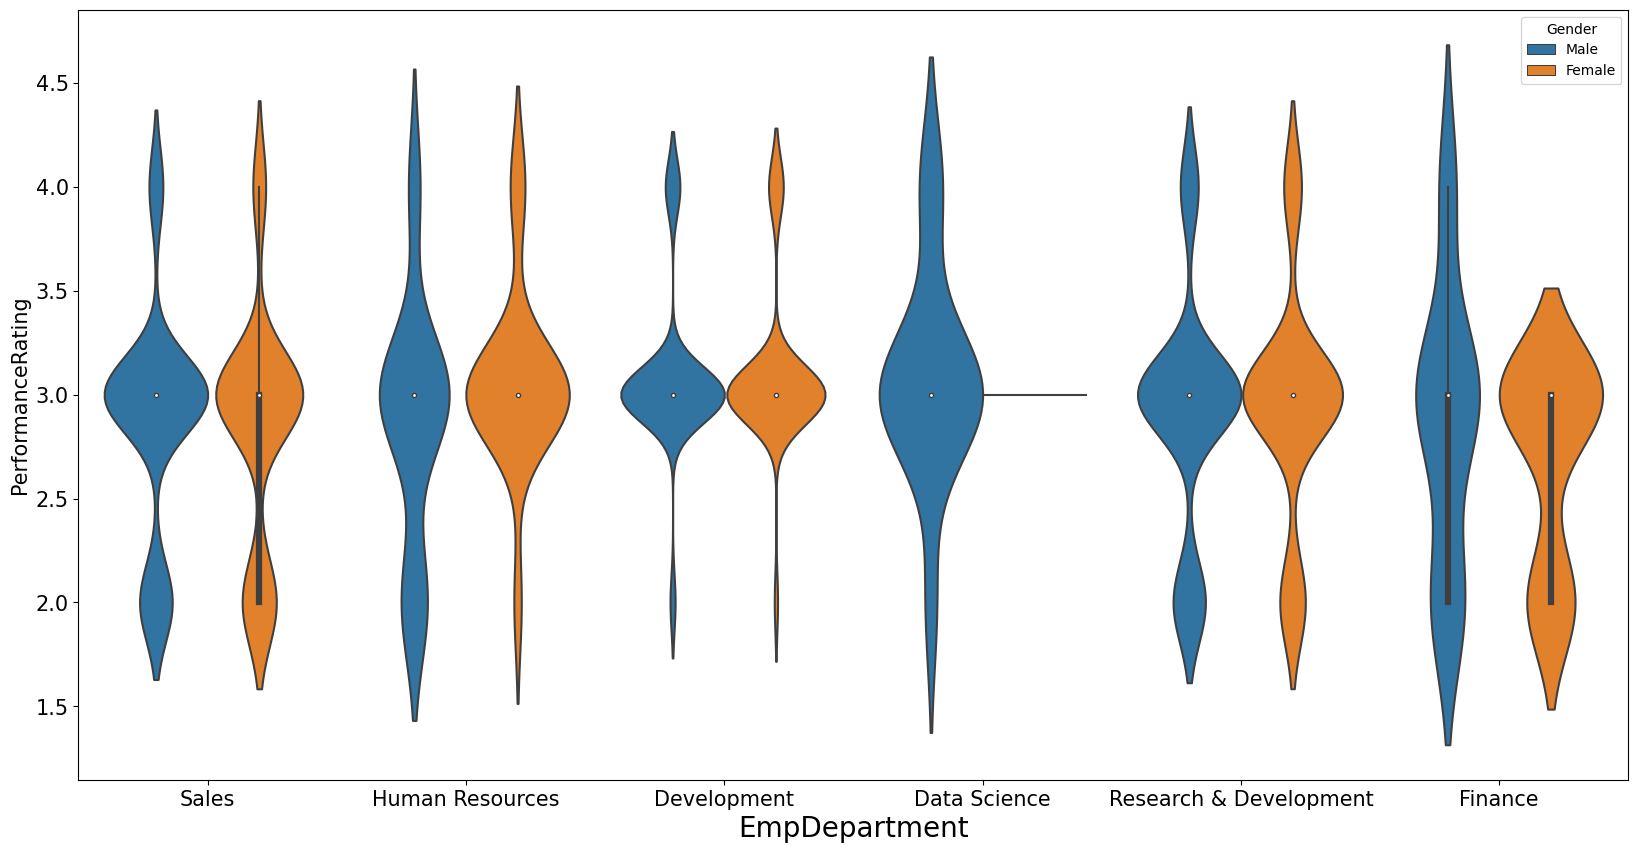

In [13]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

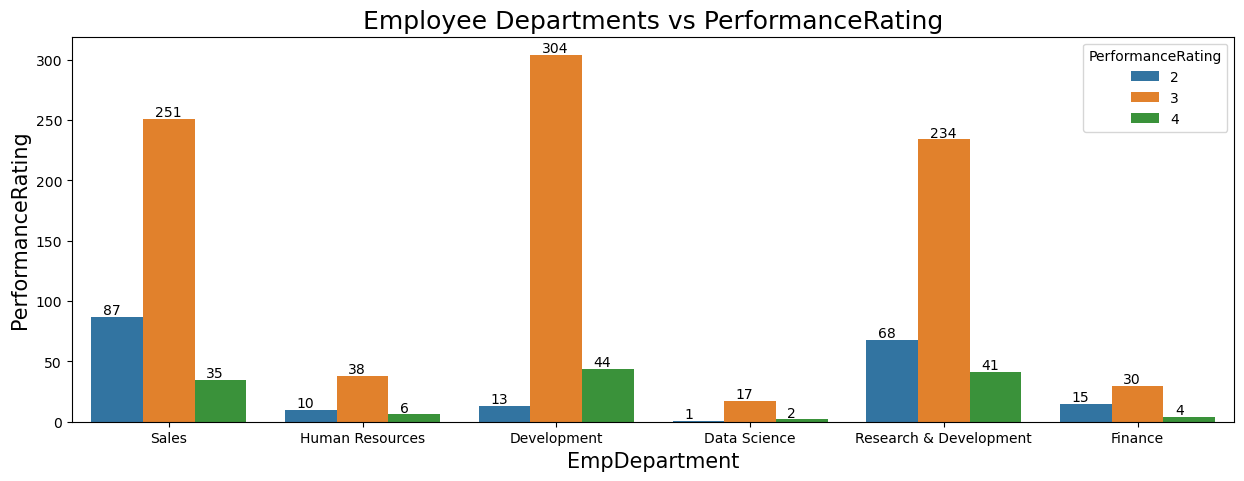

In [14]:
plt.figure(figsize=(15,5),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=18)
plt.xlabel('EmpDepartment',fontsize=15)
plt.ylabel('PerformanceRating',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Observation:

**From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating**

**1. SALES:**
- Among the various performance levels, employees in the sales department consistently exhibit a higher performance rating at level 3 in contrast to levels 2 and 4. 
- Moreover, a fascinating gender-based disparity emerges within the sales department's performance ratings. The data reveals that female employees tend to receive slightly higher performance ratings compared to their male counterparts. 

**2. HUMAN RESOURCES:**
- In the Human Resources department there's a clear seen performance rating trend  employees often higher performance rating at level 3 compared to both level 2 and level 4. Interestingly, when we look at gender differences, male employees in HR tend to have higher performance ratings compared to their female colleagues.

**3. DEVELOPMENT:**
- In the Development department, most employees are getting better performance ratings at level 3 compared to levels 2 and 4. Surprisingly, there's not much of a difference between male and female employees—they both have almost the same ratings.

**4. DATA SCIENCE:**
- In the Data Science department, employees tend to excel with higher performance ratings at level 3 compared to levels 2 and 4. Male employees, in particular, are performing well in this department. However, overall performance ratings in this department are lower compared to other departments.

**5. REASEARCH AND DEVELOPMENT:**
- In the Research and Development department, employees receive higher performance ratings at level 3 compared to levels 2 and 4. Interestingly, female employees have slightly higher performance ratings than their male counterparts in this department.

**6. FINANCE:**
- In the Finance department, employees tend to have higher performance ratings at level 3 compared to levels 2 and 4. Notably, male employees excel in this department. 


### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [15]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**

1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

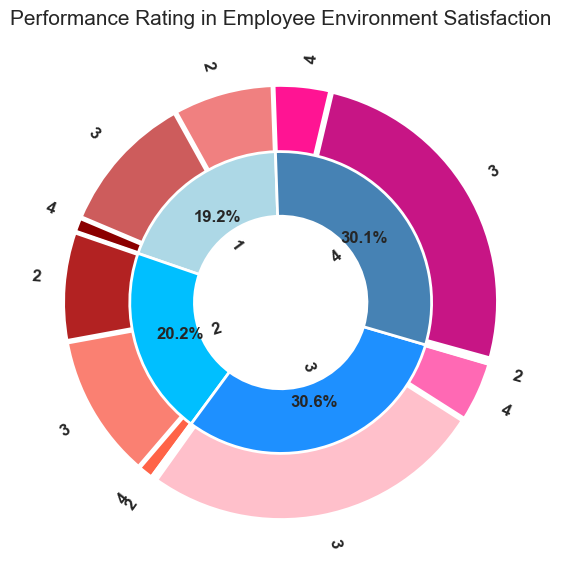

In [31]:
import matplotlib.pyplot as plt

# Data
data1 = [90, 127, 13, 98, 130, 14, 3, 310, 54, 3, 307, 51]
labels1 = [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]

data2 = [230, 242, 367, 361]
labels2 = [1, 2, 3, 4]

colors1 = ["lightcoral", "indianred", "darkred", "firebrick", "salmon", "tomato",
           "lightpink", "pink", "hotpink", "palevioletred", "mediumvioletred", "deeppink"]

colors2 = ["lightblue", "deepskyblue", "dodgerblue", "steelblue"]

# Plotting the pie chart
plt.figure(figsize=(15, 7))
plt.title("Performance Rating in Employee Environment Satisfaction", fontsize=15)

plt.pie(data1, radius=1, colors=colors1, explode=[0.01]*12, labels=labels1, rotatelabels=True,
        pctdistance=0.82, textprops={"fontsize": 12, "fontweight": "bold"}, startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w', linewidth=3))

plt.pie(data2, radius=0.7, colors=colors2, wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2),
        textprops={"fontsize": 12, "fontweight": "bold"}, autopct='%.1f%%',
        labels=labels2, pctdistance=0.70, labeldistance=0.4, rotatelabels=True, startangle=92)

plt.show()

In [17]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [18]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


#### OBSERVATION

**1. Employee Environment Satisfaction:**

The predominant performance ratings for employees are found at levels 3 and 4, with 367 and 361 employees, respectively, indicating a high level of satisfaction with their work environment.

**2. Employee Last Salary Hike Percent:**

Employees experiencing a salary hike in the range of 11-19% are more likely to receive performance ratings of 2 and 3. In contrast, those receiving a hike between 20-22% tend to achieve higher performance ratings, especially at level 4.

**3. Employee Work-Life Balance:**

Employees who report a work-life balance at level 3 demonstrate higher performance ratings, suggesting a positive association between work-life balance and overall work performance.

### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE

- Those feature continuous in nature only use this feature to plot a distribution

**Distplot:** Distplot is used to observe how the data is distributed in a particular dataset.

In [19]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


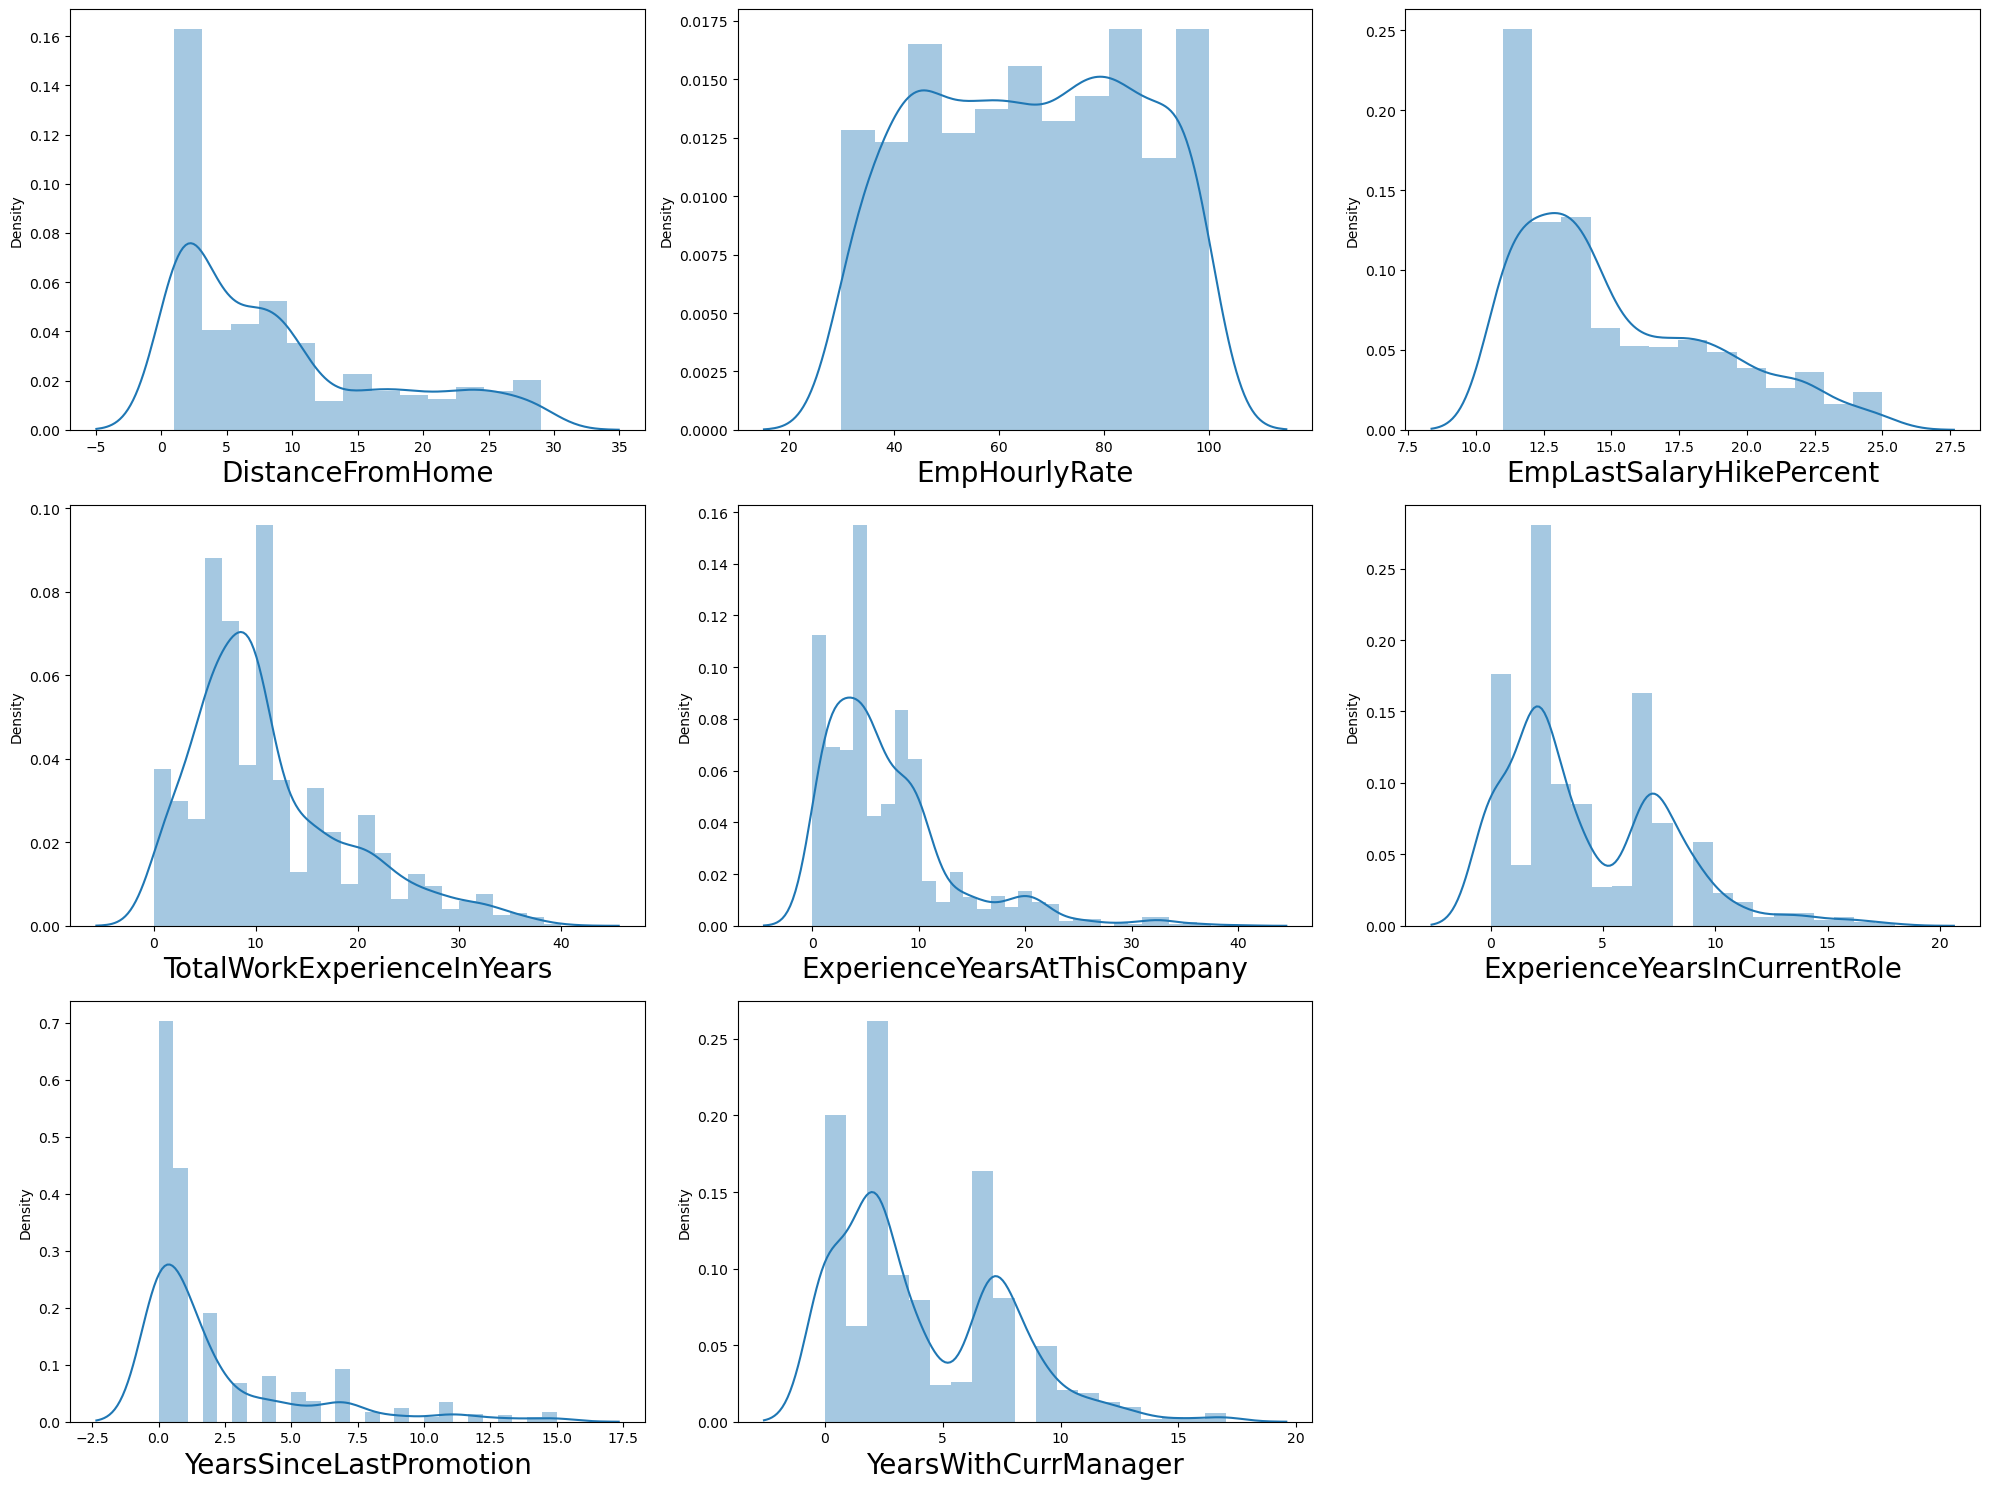

In [20]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### CHECK THE SKEWNESS

In [21]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


- From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

### CHECK THE KURTOSIS

**Kurtosis:** kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [22]:
print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


- From above all Feature kurtosis only high in two features experiance year at this company & Year Since Last Promotion have kutosis so we need to do feature transformation in data preprocessing

### DISTRIBUTION OF MEAN OF DATA

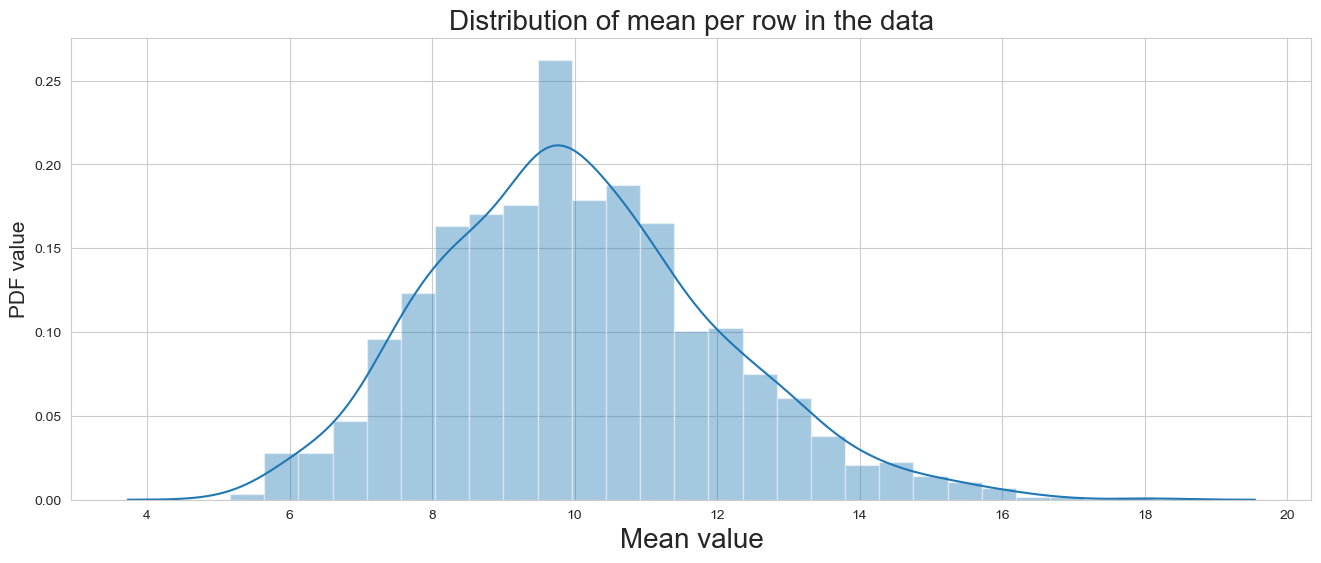

In [26]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].mean(axis=1), kde=True)
plt.show()

#### OBSERVATION:

The depicted graph closely resembles a Gaussian distribution with a mean value of 9.5. Based on the graph, it can be inferred that approximately 80% of the feature means fall within the range of 8.5 to 10.5.

### DISTRIBUTION OF STANDARD DEVIATION OF DATA

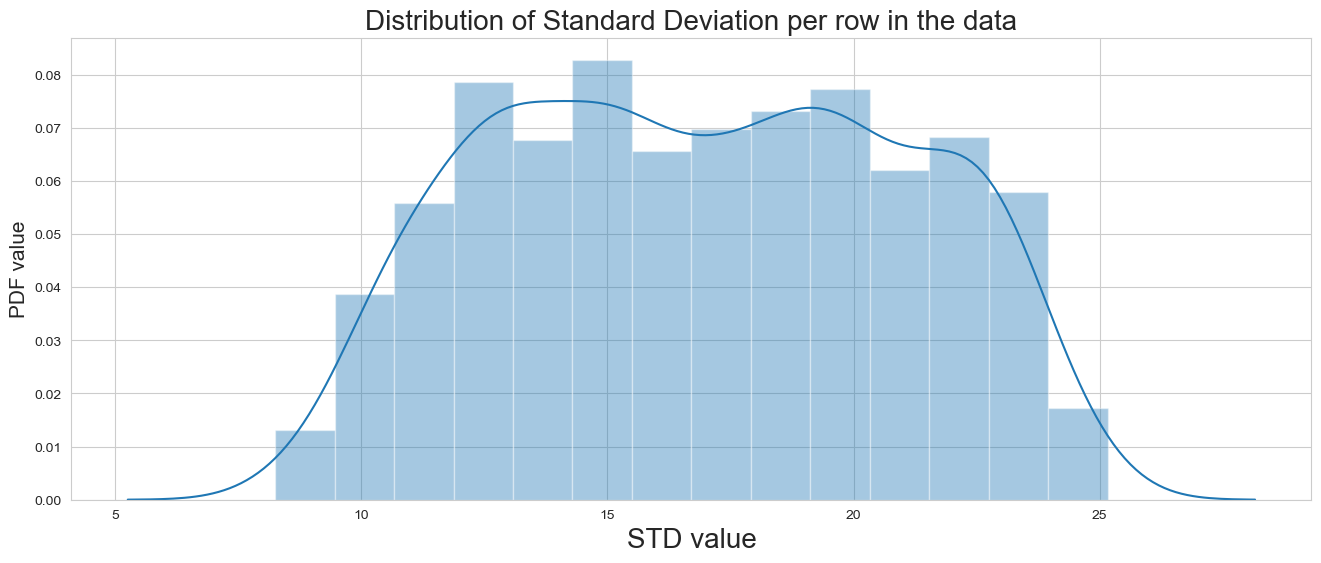

In [25]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].std(axis=1), kde=True)
plt.show()

#### OBERVATION:
- The graph exhibits a Gaussian distribution, with approximately 30% of the feature standard deviation concentrated in the range of 3 to 20, while the remaining 70% of the feature standard deviation is distributed within the range of 0 to 2.